In [54]:
# import dependencies
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pickle

In [2]:
# from google.colab import drive

# drive.mount('/content/drive')

In [3]:
# Read in CSV
# cred_data = pd.read_csv('drive/MyDrive/Loan_Eligibility_ML/Resources/credit_risk_dataset.csv')
cred_data = pd.read_csv('./Resources/credit_risk_dataset.csv')

# Create dataframe
cred_df = pd.DataFrame(cred_data)
cred_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26


In [4]:
# check initial length before cleaning
len(cred_df.index)

32581

In [5]:
# Drop null values
clean_cred_df = cred_df.dropna(axis=0, how='any')

In [6]:
len(clean_cred_df.index)

28638

In [7]:
# check age and drop any odd values
clean_cred_df.drop(clean_cred_df[clean_cred_df['person_age']>= 100].index, inplace=True)
clean_cred_df['person_age'].unique()

C:\Users\LAHUNT\AppData\Local\Temp\ipykernel_23072\4041936413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_cred_df.drop(clean_cred_df[clean_cred_df['person_age']>= 100].index, inplace=True)


array([22, 21, 25, 23, 24, 26, 20, 32, 34, 29, 33, 28, 35, 31, 27, 30, 36,
       50, 37, 39, 40, 43, 41, 46, 38, 47, 42, 44, 48, 45, 49, 58, 65, 51,
       53, 66, 57, 59, 62, 54, 60, 55, 52, 61, 64, 70, 78, 69, 56, 73, 63,
       80, 84, 76, 67], dtype=int64)

In [8]:
# Convert cb_person_default_on_file	 to 0 = y and 1 = n
clean_cred_df.cb_person_default_on_file[clean_cred_df.cb_person_default_on_file == 'Y'] = 0
clean_cred_df.cb_person_default_on_file[clean_cred_df.cb_person_default_on_file == 'N'] = 1

C:\Users\LAHUNT\AppData\Local\Temp\ipykernel_23072\82347455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_cred_df.cb_person_default_on_file[clean_cred_df.cb_person_default_on_file == 'Y'] = 0
C:\Users\LAHUNT\AppData\Local\Temp\ipykernel_23072\82347455.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_cred_df.cb_person_default_on_file[clean_cred_df.cb_person_default_on_file == 'N'] = 1


In [9]:
# Use get_dummies to convert columns to int
clean_cred_df = pd.get_dummies(clean_cred_df,
                            columns=['person_home_ownership', 'loan_intent'], dtype=int)

In [10]:
clean_cred_df = clean_cred_df.drop(columns=['loan_intent_VENTURE', 'person_home_ownership_OTHER'])

In [11]:
clean_cred_df

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL
0,22,59000,123.0,35000,16.02,1,0.59,0,3,0,0,1,0,0,0,0,1
1,21,9600,5.0,1000,11.14,0,0.10,1,2,0,1,0,0,1,0,0,0
2,25,9600,1.0,5500,12.87,1,0.57,1,3,1,0,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,1,0.53,1,2,0,0,1,0,0,0,1,0
4,24,54400,8.0,35000,14.27,1,0.55,0,4,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,1,30,1,0,0,0,0,0,0,1
32577,54,120000,4.0,17625,7.49,0,0.15,1,19,1,0,0,0,0,0,0,1
32578,65,76000,3.0,35000,10.99,1,0.46,1,28,0,0,1,0,0,1,0,0
32579,56,150000,5.0,15000,11.48,0,0.10,1,26,1,0,0,0,0,0,0,1


In [12]:
# check employment length and drop any odd values
clean_cred_df.drop(clean_cred_df[clean_cred_df['person_emp_length']>= 60].index, inplace=True)
clean_cred_df['person_emp_length'].unique()

array([ 5.,  1.,  4.,  8.,  2.,  6.,  7.,  0.,  9.,  3., 10., 11., 18.,
       12., 17., 14., 16., 13., 19., 15., 22., 20., 21., 24., 23., 26.,
       25., 27., 31., 28., 41., 34., 29., 38., 30.])

In [13]:
# check loan_percent_income and drop any odd values
clean_cred_df.drop(clean_cred_df[clean_cred_df['loan_percent_income']<= .01].index, inplace=True)
clean_cred_df['loan_percent_income'].unique()

array([0.1 , 0.57, 0.53, 0.55, 0.25, 0.45, 0.44, 0.42, 0.16, 0.41, 0.37,
       0.32, 0.3 , 0.06, 0.29, 0.31, 0.22, 0.52, 0.14, 0.49, 0.13, 0.5 ,
       0.35, 0.17, 0.27, 0.33, 0.08, 0.03, 0.21, 0.63, 0.47, 0.4 , 0.07,
       0.38, 0.34, 0.04, 0.23, 0.11, 0.43, 0.51, 0.28, 0.19, 0.39, 0.09,
       0.05, 0.15, 0.59, 0.18, 0.6 , 0.48, 0.12, 0.54, 0.56, 0.46, 0.36,
       0.24, 0.02, 0.26, 0.2 , 0.72, 0.64, 0.69, 0.77, 0.61, 0.83, 0.65,
       0.67, 0.58, 0.71, 0.68, 0.7 , 0.66, 0.76, 0.62, 0.78])

In [14]:
# check interest rates for any outliers
clean_cred_df['loan_int_rate']

int_outlier = clean_cred_df['loan_int_rate']
quartiles = np.quantile(int_outlier,[.25,.75])
iqr = quartiles[1]-quartiles[0]
lower_bound = quartiles[0]-(1.5*iqr)
upper_bound = quartiles[1]+(1.5*iqr)
print (f"quartiles = {quartiles} & IQR = {iqr}")
print (f"lower bound = {lower_bound} & upper bound = {upper_bound}")
potential_outliers_int_outlier = [value for value in int_outlier if value < lower_bound or value > upper_bound]
potential_outliers_int_outlier

quartiles = [ 7.9  13.48] & IQR = 5.58
lower bound = -0.47000000000000064 & upper bound = 21.85


[22.11, 22.11, 22.06, 22.11, 22.48, 23.22]

In [15]:
# Define features set
X = clean_cred_df.copy()
X.drop("loan_status", axis=1, inplace=True)
X.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL
1,21,9600,5.0,1000,11.14,0.10,1,2,0,1,0,0,1,0,0,0
2,25,9600,1.0,5500,12.87,0.57,1,3,1,0,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,0.53,1,2,0,0,1,0,0,0,1,0
4,24,54400,8.0,35000,14.27,0.55,0,4,0,0,1,0,0,0,1,0
5,21,9900,2.0,2500,7.14,0.25,1,2,0,1,0,0,0,0,0,0


In [44]:
# Define target vector
y = clean_cred_df["loan_status"].values.reshape(-1, 1)
y = y.astype('int')
y[:10]

array([[0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [51]:
# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)
y_test[:10]

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0]])

In [18]:
# Scale data
# Create the StandardScaler instance
scaler = StandardScaler()

# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [19]:
# Create the decision tree classifier instance
model = tree.DecisionTreeClassifier()

In [20]:
# Fit the model from decision tree classifier
model = model.fit(X_train_scaled, y_train)

In [21]:
# Making predictions using the testing data from decision tree classifier
predictions = model.predict(X_test_scaled)

In [22]:
# Calculating the confusion matrix for decision tree classifier
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [23]:
# Displaying results of decision tree classifier
print("Confusion Matrix")
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix
Accuracy Score : 0.8727017543859649
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      5576
           1       0.70      0.73      0.71      1549

    accuracy                           0.87      7125
   macro avg       0.81      0.82      0.82      7125
weighted avg       0.88      0.87      0.87      7125



In [24]:
# Remaking model with SVC
from sklearn.svm import SVC 
model_2 = SVC(kernel='linear')
model_2 = model_2.fit(X_train_scaled, y_train)

C:\Users\LAHUNT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
# Making predictions using the testing data from SVC model
predictions_2 = model_2.predict(X_test_scaled)

In [26]:
# Calculating the confusion matrix for SVC
cm_2 = confusion_matrix(y_test, predictions_2)
cm_2_df = pd.DataFrame(
    cm_2, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score_2 = accuracy_score(y_test, predictions_2)

In [27]:
# Displaying results of decision tree classifier
print("Confusion Matrix")
display(cm_2_df)
print(f"Accuracy Score : {acc_score_2}")
print("Classification Report")
print(classification_report(y_test, predictions_2))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,5346,230
Actual 1,878,671


Accuracy Score : 0.8444912280701754
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      5576
           1       0.74      0.43      0.55      1549

    accuracy                           0.84      7125
   macro avg       0.80      0.70      0.73      7125
weighted avg       0.83      0.84      0.83      7125



In [28]:
# Remaking model with Logistic Regression
from sklearn.linear_model import LogisticRegression
model_3 = LogisticRegression(solver='liblinear', random_state=1)
model_3 = model_3.fit(X_train_scaled, y_train)

C:\Users\LAHUNT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
# Making predictions using the testing data from logistic regression
predictions_3 = model_3.predict(X_test_scaled)

In [30]:
# Calculating the confusion matrix for logistic regression
cm_3 = confusion_matrix(y_test, predictions_3)
cm_3_df = pd.DataFrame(
    cm_3, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score_3 = accuracy_score(y_test, predictions_3)

In [31]:
# Displaying results of logistic regression
print("Confusion Matrix")
display(cm_3_df)
print(f"Accuracy Score : {acc_score_3}")
print("Classification Report")
print(classification_report(y_test, predictions_3))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,5293,283
Actual 1,795,754


Accuracy Score : 0.848701754385965
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      5576
           1       0.73      0.49      0.58      1549

    accuracy                           0.85      7125
   macro avg       0.80      0.72      0.75      7125
weighted avg       0.84      0.85      0.84      7125



In [32]:
# Remaking model with KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
model_4 = KNeighborsClassifier(n_neighbors=9)
model_4 = model_4.fit(X_train_scaled, y_train)

C:\Users\LAHUNT\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [33]:
# Making predictions using the testing data from KNeighborsClassifier
predictions_4 = model_4.predict(X_test_scaled)

In [34]:
# Calculating the confusion matrix for logistic regression
cm_4 = confusion_matrix(y_test, predictions_4)
cm_4_df = pd.DataFrame(
    cm_4, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score_4 = accuracy_score(y_test, predictions_4)

In [35]:
# Displaying results of logistic regression
print("Confusion Matrix")
display(cm_4_df)
print(f"Accuracy Score : {acc_score_4}")
print("Classification Report")
print(classification_report(y_test, predictions_4))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,5437,139
Actual 1,751,798


Accuracy Score : 0.8750877192982456
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.98      0.92      5576
           1       0.85      0.52      0.64      1549

    accuracy                           0.88      7125
   macro avg       0.87      0.75      0.78      7125
weighted avg       0.87      0.88      0.86      7125



In [36]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=78, criterion='gini')

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions_rf = rf_model.predict(X_test_scaled)

C:\Users\LAHUNT\AppData\Local\Temp\ipykernel_23072\2664256123.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model = rf_model.fit(X_train_scaled, y_train)


In [53]:
path_rf = rf_model.predict_proba(X_test_scaled)
path_rf[0][0]

array([0.92, 0.08])

In [47]:
X_test_scaled

array([[-0.76261263, -0.45315177, -0.19312699, ..., -0.35238   ,
        -0.47352593,  2.22763172],
       [-0.92528921, -0.90315613,  0.05615377, ..., -0.35238   ,
        -0.47352593,  2.22763172],
       [-0.43725945, -0.35213038, -0.69168852, ..., -0.35238   ,
        -0.47352593,  2.22763172],
       ...,
       [-0.76261263, -0.75621593, -0.19312699, ..., -0.35238   ,
         2.11181678, -0.44890724],
       [-0.27458286,  0.08409833,  1.30255759, ..., -0.35238   ,
         2.11181678, -0.44890724],
       [ 1.18950644, -0.79857603, -0.19312699, ..., -0.35238   ,
         2.11181678, -0.44890724]])

In [37]:
# Calculating the confusion matrix
cm_rf = confusion_matrix(y_test, predictions_rf)
cm_rf_df = pd.DataFrame(
    cm_rf, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score_rf = accuracy_score(y_test, predictions_rf)

In [38]:
# Displaying results
print("Confusion Matrix")
display(cm_rf_df)
print(f"Accuracy Score : {acc_score_rf}")
print("Classification Report")
print(classification_report(y_test, predictions_rf))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,5502,74
Actual 1,496,1053


Accuracy Score : 0.92
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      5576
           1       0.93      0.68      0.79      1549

    accuracy                           0.92      7125
   macro avg       0.93      0.83      0.87      7125
weighted avg       0.92      0.92      0.92      7125



In [39]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.225582916897918, 'loan_percent_income'),
 (0.20629005493082314, 'loan_int_rate'),
 (0.14966139999036365, 'person_income'),
 (0.08355382908352428, 'loan_amnt'),
 (0.059122480120526094, 'person_emp_length'),
 (0.05501218583474568, 'person_home_ownership_RENT'),
 (0.05048869014176913, 'person_age'),
 (0.03748633992171542, 'cb_person_cred_hist_length'),
 (0.025799182526367787, 'person_home_ownership_MORTGAGE'),
 (0.022447108371979538, 'loan_intent_DEBTCONSOLIDATION'),
 (0.020657073229463137, 'loan_intent_MEDICAL'),
 (0.016752556771553382, 'person_home_ownership_OWN'),
 (0.015575964705920469, 'cb_person_default_on_file'),
 (0.01384155982041956, 'loan_intent_HOMEIMPROVEMENT'),
 (0.009182049790700501, 'loan_intent_EDUCATION'),
 (0.008546607862210258, 'loan_intent_PERSONAL')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

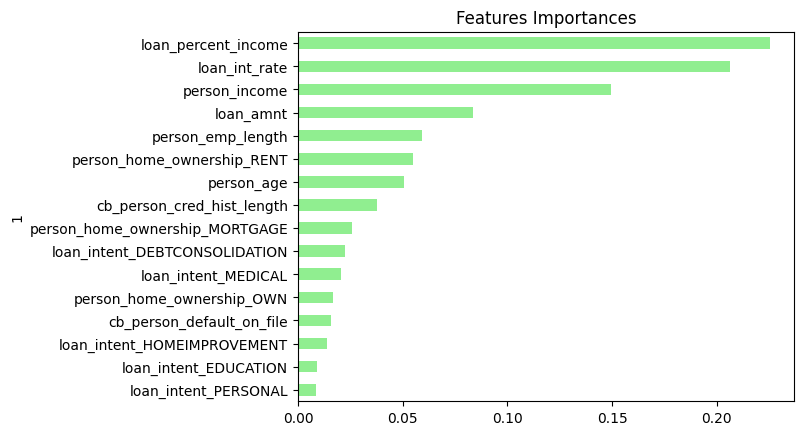

In [40]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

In [56]:
# Save the model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)